# Data Analysis

### EDA

In [1]:
import pandas as pd

In [2]:
df = pd.read_excel(r'/home/yash/project/ineuron_internship_projects/ML-project-internship/Concrete_file_path/Concrete_Data.xls')

In [5]:
# df = pd.DataFrame(df)

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

In [5]:
df.isna().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

### UNIVARIATE ANALYSIS

In [6]:
col = df.columns.to_list()
col

['Cement (component 1)(kg in a m^3 mixture)',
 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)',
 'Fly Ash (component 3)(kg in a m^3 mixture)',
 'Water  (component 4)(kg in a m^3 mixture)',
 'Superplasticizer (component 5)(kg in a m^3 mixture)',
 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)',
 'Fine Aggregate (component 7)(kg in a m^3 mixture)',
 'Age (day)',
 'Concrete compressive strength(MPa, megapascals) ']

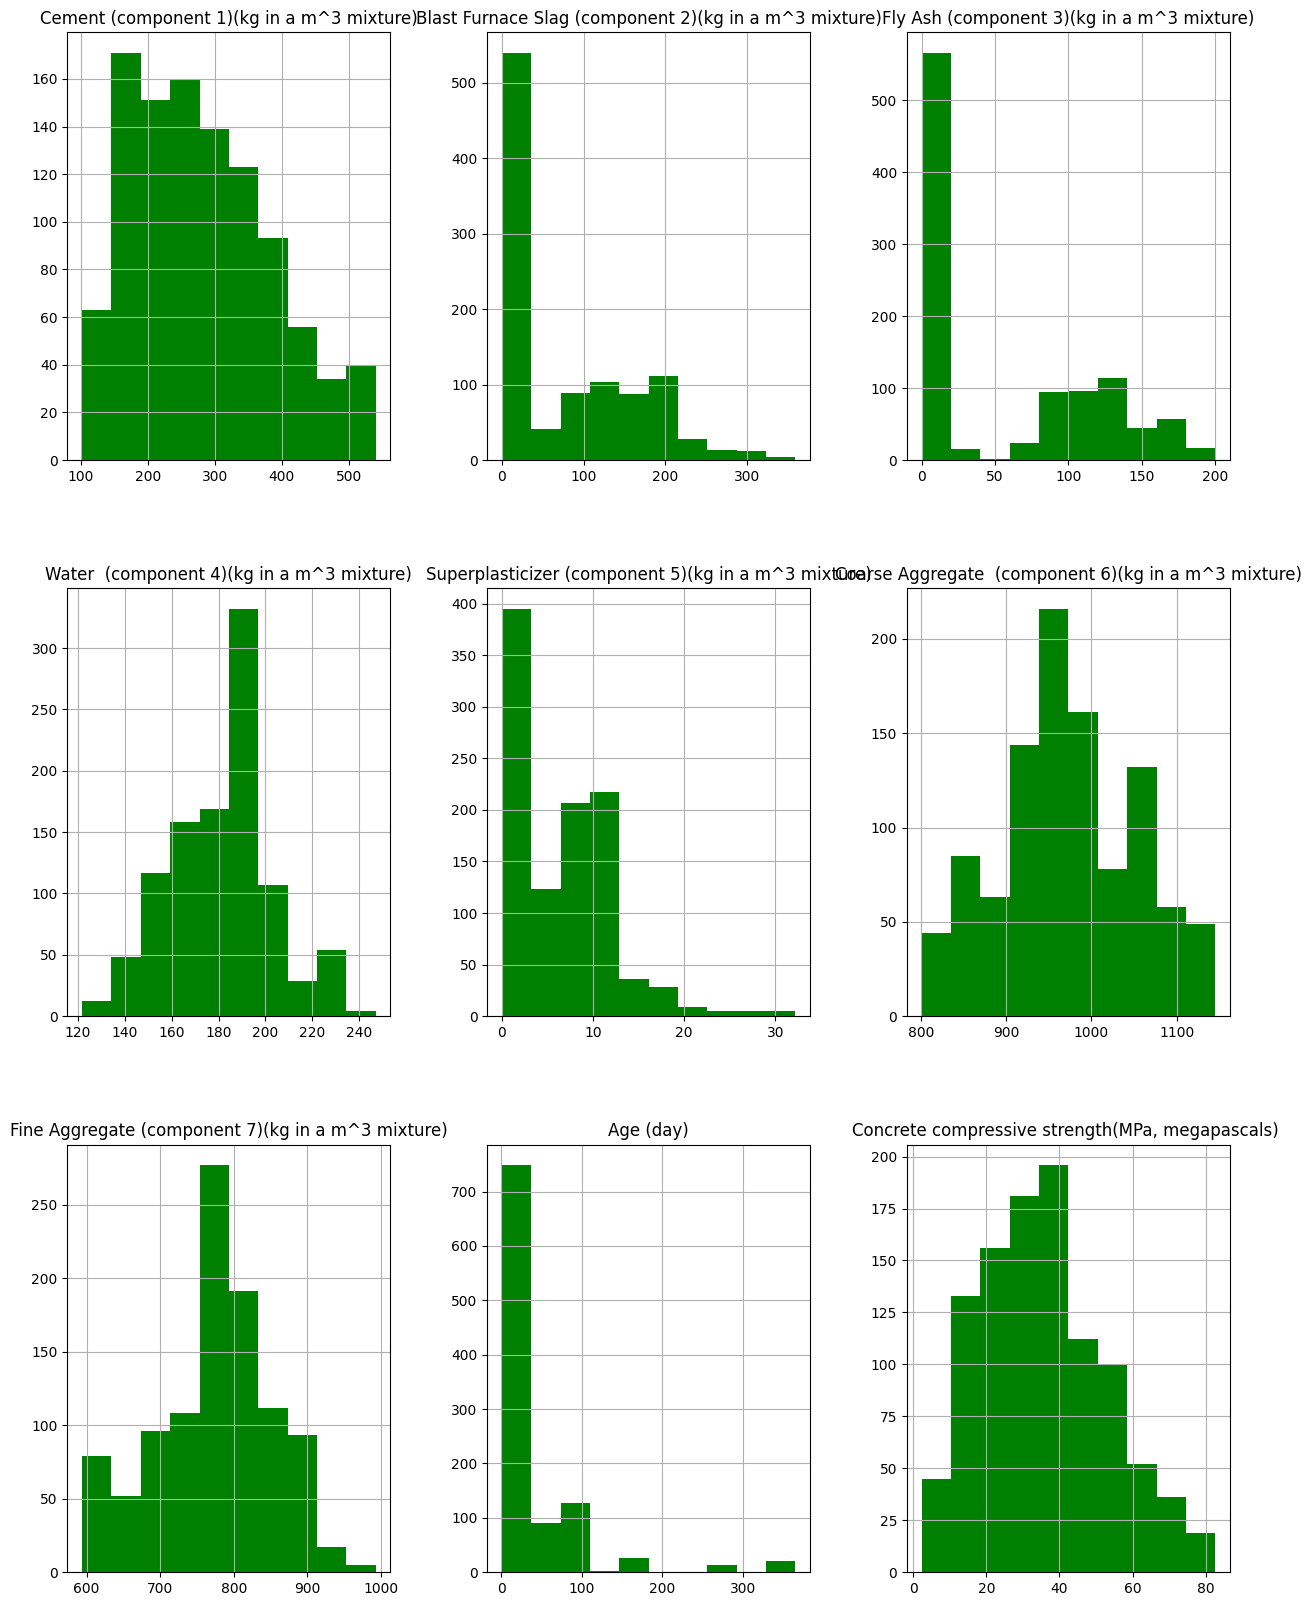

In [7]:
import matplotlib.pyplot as plt

df.hist(figsize=(15,20),color='green')
plt.show()

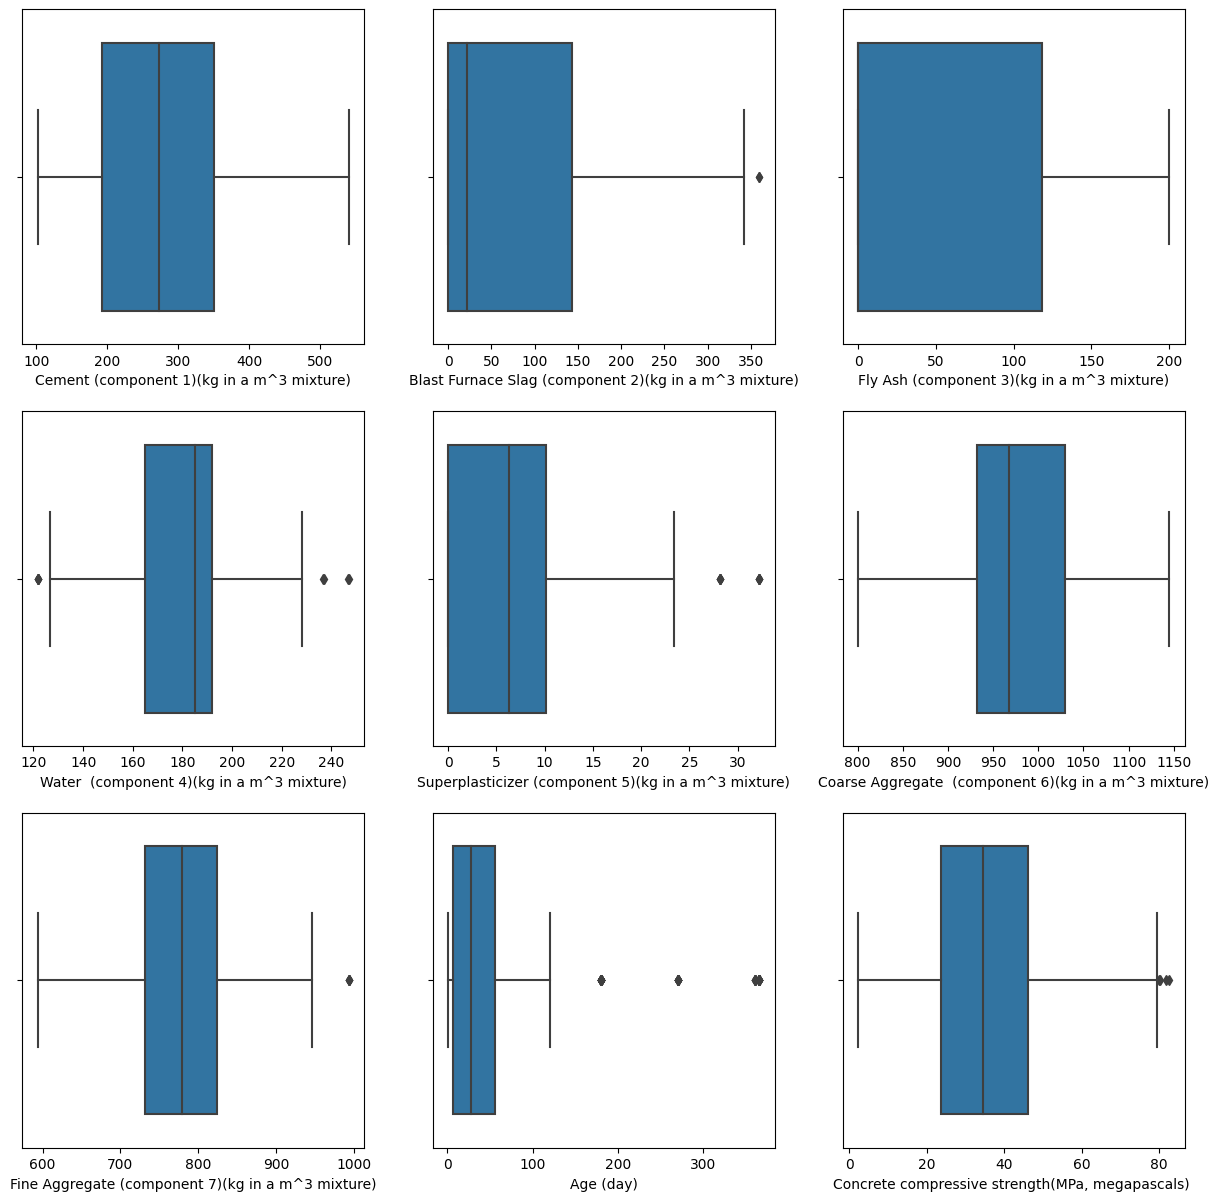

In [8]:
import seaborn as sns
i = 1
plt.figure(figsize=(15,20))
for col in df.columns:
    plt.subplot(4,3,i)
    sns.boxplot(x = df[col], data = df)
    i+=1

BIVARIATE ANALYSIS

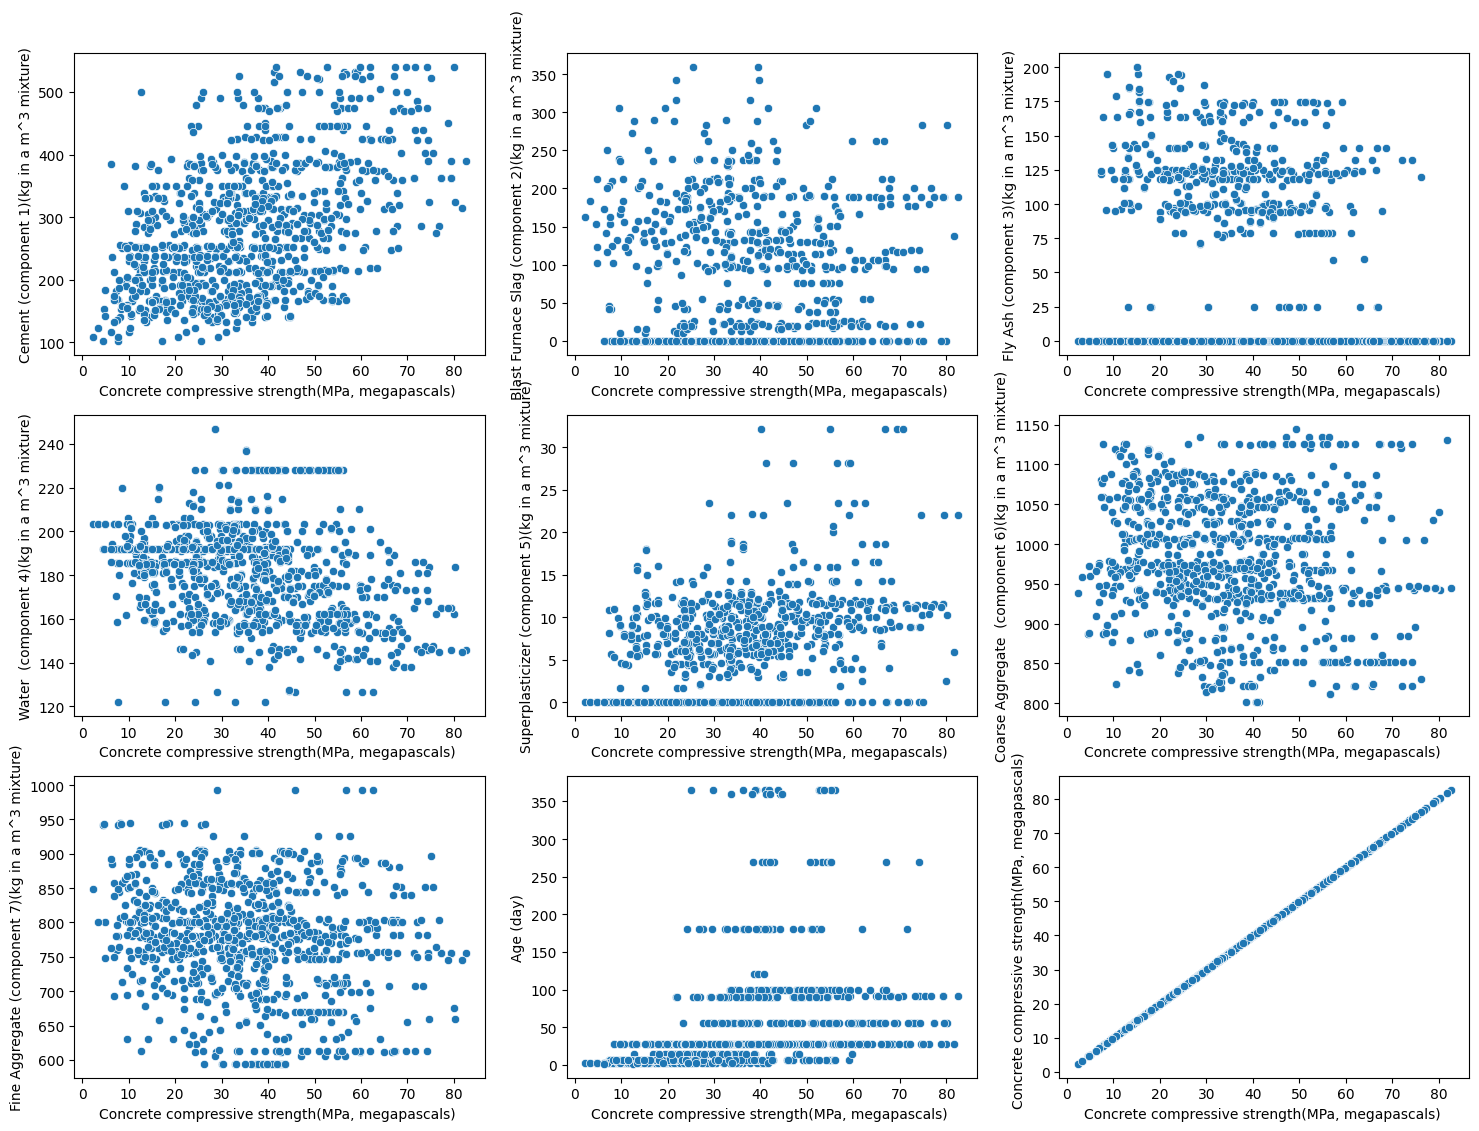

In [9]:
i = 1

plt.figure(figsize=(18,18))
for col in df.columns:
    plt.subplot(4,3,i)
    sns.scatterplot(data=df, x='Concrete compressive strength(MPa, megapascals) ',y=col)
    i+=1

As we can see cement is highly coreleated with concrete compresive strength

<AxesSubplot:>

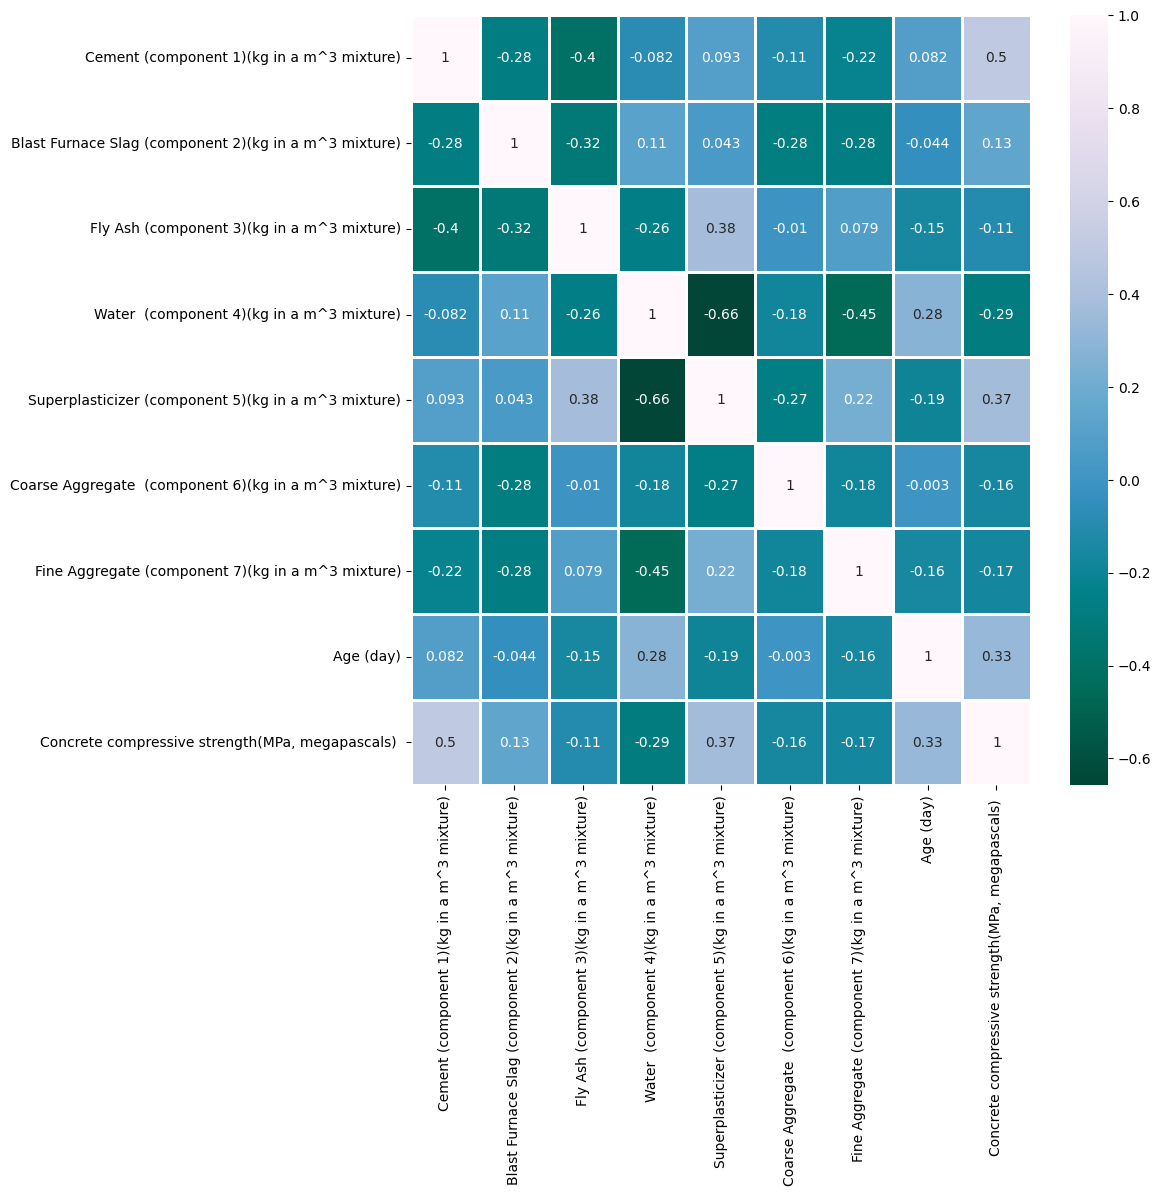

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),linewidths=1,cmap='PuBuGn_r',annot=True)

<AxesSubplot:>

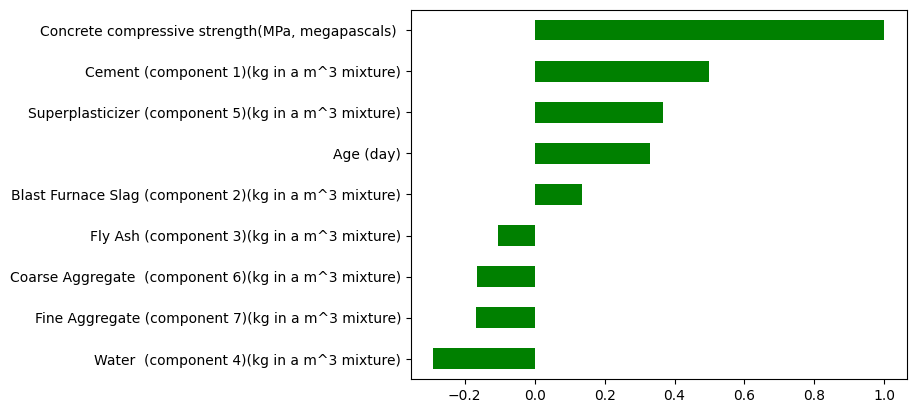

In [11]:
correlation = df.corr()['Concrete compressive strength(MPa, megapascals) '].sort_values()
correlation.plot(kind='barh',color='green')

we can see that cement, superplasticizer, age are positively coreleated while water, fing aggregrate are negatively coreleated with compressive strength.

# Data Preprocessing

In [12]:
# Split Data Train Test split

X= df.iloc[:,:-1] # Features
Y=df.iloc[:,-1] # Target


In [18]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 8 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 64.5 KB


In [21]:
Y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X_train,X_test, y_train,y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [25]:
X_train

array([[ 1.11763099,  0.25157849, -0.83798285, ..., -0.3494997 ,
         0.99446802, -0.28564741],
       [-0.64929548, -0.22015051,  1.0756891 , ...,  0.51760092,
         0.1064638 , -0.49678526],
       [ 1.53549161, -0.56385527,  0.40231647, ..., -0.09001181,
        -0.74503688, -0.60235418],
       ...,
       [ 0.06399827, -0.84066447,  0.67204232, ..., -0.16477515,
         1.15463656, -0.66267928],
       [ 0.97771386, -0.60999014,  0.63781634, ..., -0.46254393,
         0.90631324, -0.60235418],
       [ 0.71300577, -0.62152385,  1.37571593, ..., -0.41116019,
         0.36000192, -0.60235418]])

In [26]:
X_test

array([[-0.78069477, -0.92516478,  0.66346322, ...,  0.38206631,
         1.55946827,  0.3212471 ],
       [-1.19814214,  0.78680213,  0.84487006, ..., -0.58883292,
        -1.56005314, -0.26089342],
       [-0.19821952, -0.92516478, -0.88450076, ...,  1.84879912,
         0.05278675, -0.26089342],
       ...,
       [-0.60469213,  0.75237284, -0.88450076, ...,  0.06275988,
        -0.38207888, -0.78066174],
       [-0.88922296,  0.09584184,  2.04141604, ..., -0.59142891,
        -2.00642992, -0.26089342],
       [ 1.5597745 ,  0.33684689, -0.88450076, ..., -1.51170639,
         1.37145283,  1.04892275]])

# ***`Model Building`***

***Liner Regression***

In [31]:
# Importing Model
from sklearn.linear_model import LinearRegression, Lasso, Ridge 

# Linear Regression
lr = LinearRegression()

# lasso Regression
lasso = Lasso()

# Ridge Regression
ridge = Ridge()

# Fitting models on Training data
lr.fit(X_train,y_train)
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)

# Fitting models on Testing data
y_pred_lr = lr.predict(X_test)
y_pred_lasso = lasso.predict(X_test)
y_pred_ridge = ridge.predict(X_test)



In [33]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("Model\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""LinerRegression \t {:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_lr)),mean_squared_error(y_test, y_pred_lr),
    mean_absolute_error(y_test, y_pred_lr), r2_score(y_test,y_pred_lr)))

print("""LassoRegression \t {:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test,y_pred_lasso)),mean_squared_error(y_test, y_pred_lasso),
    mean_absolute_error(y_test,y_pred_lasso),r2_score(y_test,y_pred_lasso)))
print("""RidgeRegression \t {:.2f} \t\t{:.2f} \t\t{:.2f} \t\t{:.2f}""".format(
    np.sqrt(mean_squared_error(y_test,y_pred_ridge)),mean_squared_error(y_test,y_pred_ridge),
    mean_absolute_error(y_test,y_pred_ridge),r2_score(y_test,y_pred_ridge)))

Model			 RMSE 		 MSE 		 MAE 		 R2
LinerRegression 	 10.25 		104.97 		7.83 		0.57
LassoRegression 	 10.41 		108.30 		8.27 		0.56
RidgeRegression 	 10.24 		104.92 		7.84 		0.57


***Decision Tree***

In [34]:

from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Decision Tree Regressor \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_dtr)), mean_squared_error(y_test,y_pred_dtr),
    mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)
))

Model				 RMSE 		 MSE 		 MAE 		 R2
Decision Tree Regressor 	 8.75 		 76.53 		 5.75 		 0.69


***Random Forest***

In [35]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100)

rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

print("Model\t\t\t\t RMSE \t\t MSE \t\t MAE \t\t R2")
print("""Random Forest Regressor \t {:.2f} \t\t {:.2f} \t\t {:.2f} \t\t {:.2f}""".format(
    np.sqrt(mean_squared_error(y_test, y_pred_dtr)), mean_squared_error(y_test,y_pred_dtr),
    mean_absolute_error(y_test, y_pred_dtr), r2_score(y_test, y_pred_dtr)
))

Model				 RMSE 		 MSE 		 MAE 		 R2
Random Forest Regressor 	 8.75 		 76.53 		 5.75 		 0.69


***Module Evaluation***

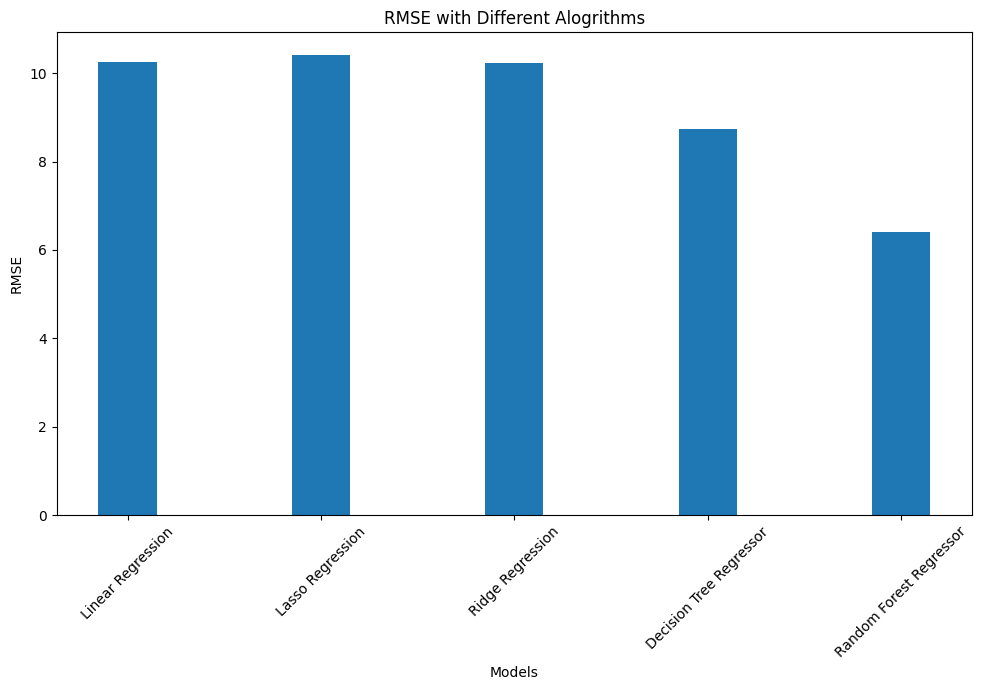

In [47]:


models = [lr, lasso, ridge, dtr, rfr]
names = ["Linear Regression", "Lasso Regression", "Ridge Regression", "Decision Tree Regressor", "Random Forest Regressor"]

rmse = []

for model in models:
    rmse.append(np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

x = np.arange(len(names))
width = 0.3

fig, ax = plt.subplots(figsize = (10,7))
rects = ax.bar(x, rmse, width)
ax.set_ylabel('RMSE')
ax.set_xlabel('Models')
ax.set_title('RMSE with Different Alogrithms')
ax.set_xticks(x)
ax.set_xticklabels(names, rotation = 45)
fig.tight_layout()
plt.show()